# Visualization

## Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines - Driven Data Labs Competition
https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/

### Problem description
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for `h1n1_vaccine` and one for `seasonal_vaccine`.

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

### Labels
For this competition, there are two target variables:

`h1n1_vaccine` - Whether respondent received H1N1 flu vaccine.
`seasonal_vaccine` - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

## Performance metric
Performance will be evaluated according to the area under the receiver operating characteristic curve (ROC AUC) for each of the two target variables. **The mean of these two scores will be the overall score.** A higher value indicates stronger performance.

In Python, you can calculate this using sklearn.metrics.roc_auc_score for this multilabel setup with the default average="macro" parameter.

## Submission format
The format for the submission file is three columns: `respondent_id`, `h1n1_vaccine`, and `seasonal_vaccine`. The predictions for the two target variables should be float probabilities that range between 0.0 and 1.0. Because the competition uses ROC AUC as its evaluation metric, the values you submit must be the probabilities that a person received each vaccine, not binary labels.

As this is a multilabel problem, the probabilities for each row do not need to sum to one.

## Benchmark Example
https://drivendata.co/blog/predict-flu-vaccine-data-benchmark/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load and preprocess the data
test_set_feat = pd.read_csv('Data/test_set_features.csv', index_col='respondent_id')
train_set_feat = pd.read_csv('Data/training_set_features.csv', index_col='respondent_id')
train_set_lab = pd.read_csv('Data/training_set_labels.csv', index_col='respondent_id')

In [4]:
# Join train_set_feat and train_set_lab by 'respondent_id' column
train_data = train_set_feat.join(train_set_lab)

In [5]:
# View Proportion of Missing Data (Descending)
train_data.isna().sum().sort_values(ascending=False)/len(train_data)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_h1n1_sick_from_vacc    0.014790
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
household_adults               0.009323
household_children             0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004343
h1n1_concern                   0.003445


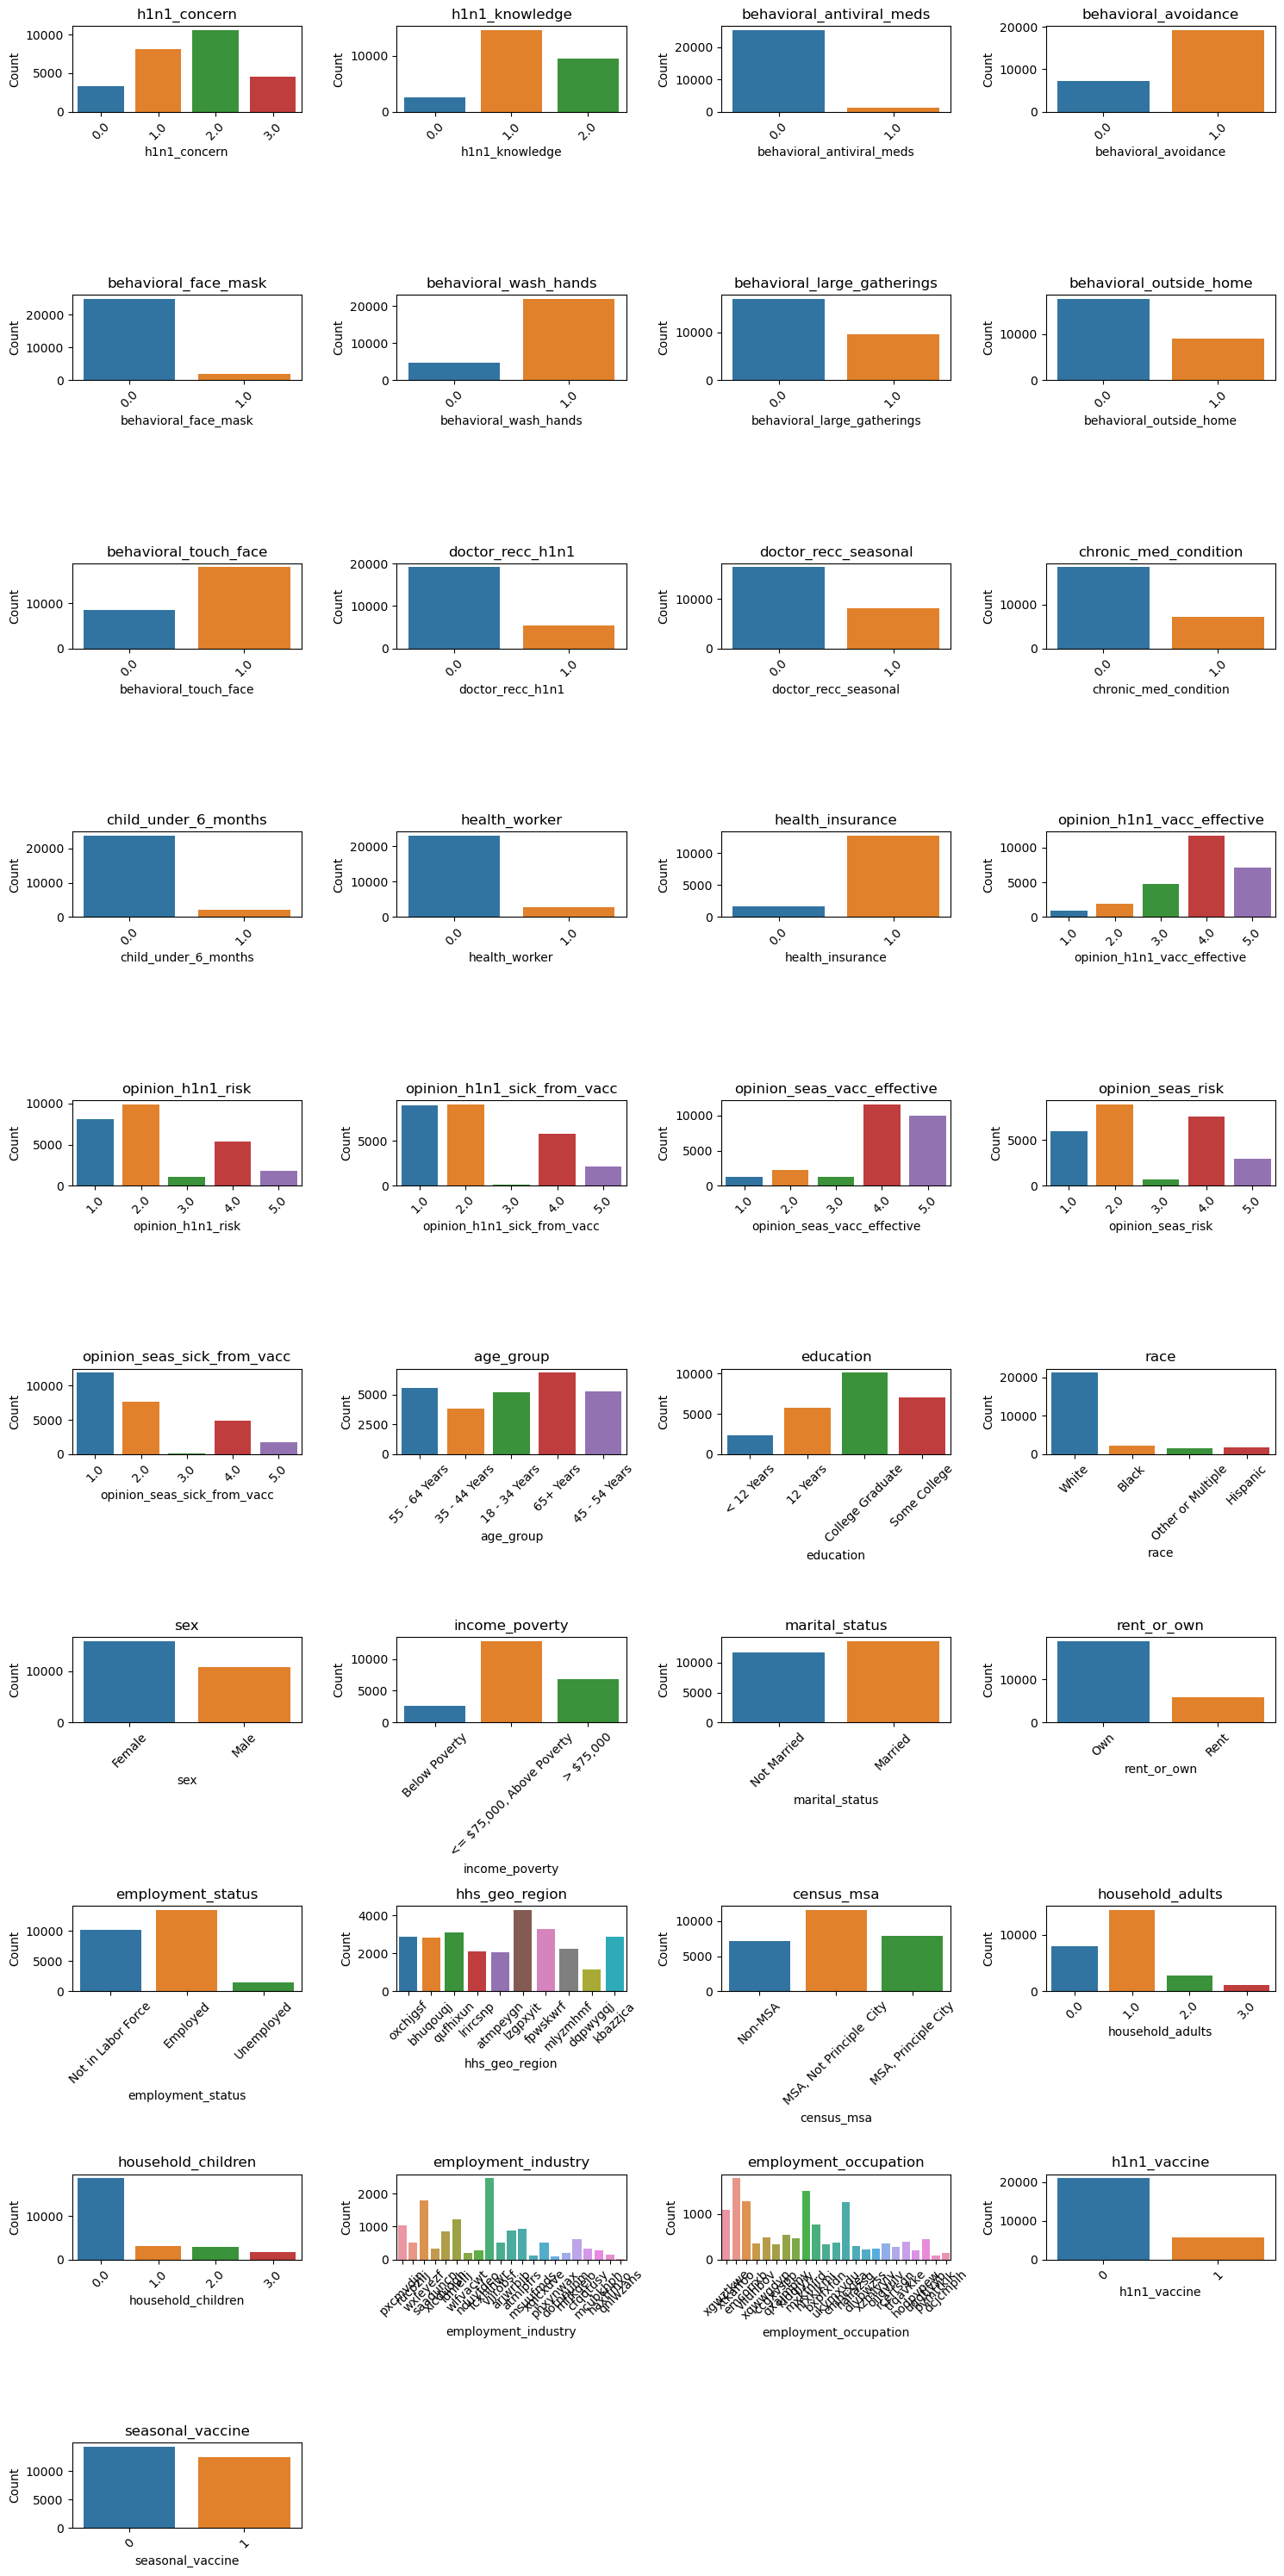

In [6]:
# Plot Categories
columns = train_data.columns

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns) + 3) // 4
num_cols = min(len(columns), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Generate the distribution plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=train_data, ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Count")

# Remove any empty subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()